In [1]:
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
# os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'D:/model/temp'






D:\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools


In [3]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)


In [8]:
content_path = tf.keras.utils.get_file('YellowLabradorLookin_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
style_path = tf.keras.utils.get_file('5.jpg','https://tenfei03.cfp.cn/creative/vcg/800/new/VCG41N1474819414.jpg')




185731/185731 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img


In [6]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

    

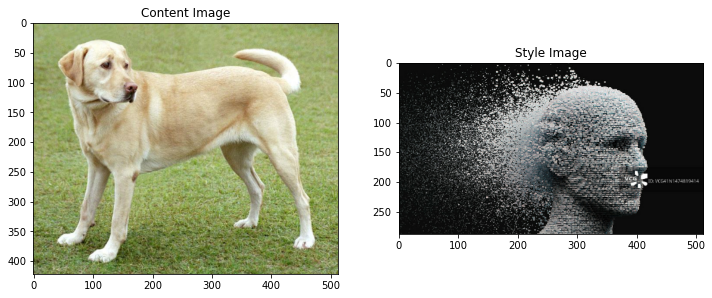

In [9]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')


In [98]:
import os
 
path = "D:/model/temp"
 
if os.path.isdir(path):
    print("The path is a directory.")
else:
    print("The path is not a directory.")


The path is a directory.


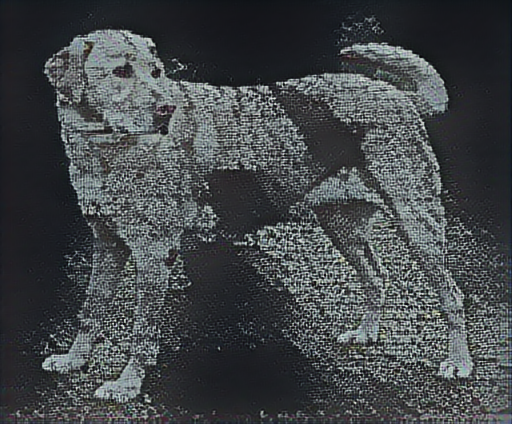

In [10]:
import tensorflow_hub as hub

# D:/model/temp
# https:/storage.googleapis.com/tfhub-modules/google/magenta/arbitrary-image-stylization-v1-256/2.tar.gz
hub_model = hub.load("D:\\deepstudy\\tfhub_models\\magenta_arbitrary-image-stylization-v1-256_2")
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)
